In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from __future__ import division
import datetime

# import the custom machine learning helper functions that are in a separate module in the same folder
import mltl

sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


#1. Additional Exploration of EUI Features

The following code imports the dataset used in the previous projects and calls the dataframe **bd**

In [2]:
# import the merged and cleaned data set from its csv
bd = pd.read_csv('buildings_clean.csv', low_memory=False)
bd = bd.set_index('BBL')

# set the various feature sets as well
targets = ['EUIwn', 'EUI', 'EUIwn_norm']
orig_class_dummies = [u'borough', u'zip', u'property_type']
orig_class = [u'water_method']
orig_cont = [u'water_ft2', u'energy_star', u'GHG', u'floor_area', u'no_buildings']
pluto_class_dummies = [u'BldgClass', u'LandUse', u'OwnerType', u'AreaSource', u'Ext', u'ProxCode', \
                       u'IrrLotCode', u'LotType', u'BsmtCode']
pluto_class = ['Landmarked', 'BuiltCode', 'Altered']
pluto_cont = [u'Easements', u'LotArea', u'BldgArea', u'ComArea', u'ResArea', u'OfficeArea', \
              u'RetailArea', u'GarageArea', u'StrgeArea', u'FactryArea', u'OtherArea', \
              u'NumBldgs', u'NumFloors', u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', \
              u'BldgFront', u'BldgDepth', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot', \
              u'BuiltFAR', u'MaxAllwFAR', 'YearBuilt', 'YearLastWork', u'PerComArea', u'PerResArea', \
              u'PerOfficeArea', u'PerRetailArea', u'PerGarageArea', u'PerStrgeArea', u'PerFactryArea',\
              u'PerOtherArea']

Now that we have the data imported, let us examine the various unique values for each of the dummy classifiers to see how many and what different kinds of values we get.

In [3]:
# Looking at a regression tree
from sklearn import tree, metrics, cross_validation, linear_model, feature_selection

In [4]:
print "Start columns and rows:", (len(bd.columns), len(bd))

# join all the possible dummy variables to the building data
dummies = pluto_class
for col in pluto_class_dummies:
    dm = pd.get_dummies(bd[col], prefix=col)
    dummies = dummies + list(dm.columns)
    bd = bd.join(dm)

print "End columns and rows:", (len(bd.columns), len(bd))

Start columns and rows: (190, 9731)
End columns and rows: (340, 9731)


In [5]:
# test the new features in the regression tree
features = pluto_cont + dummies
tr = tree.DecisionTreeRegressor()
tr.fit(bd[features], bd.EUIwn)

# get the feature importance
feat_imp = pd.DataFrame({'features': features, 'importance': tr.feature_importances_}).sort('importance', 
                                                                                            ascending=False)
feat_imp

,features,importance
147,LandUse_05,0.129002
77,BldgClass_I1,0.080447
25,YearBuilt,0.065816
19,AssessLand,0.045460
20,AssessTot,0.038809
26,YearLastWork,0.036731
150,LandUse_08,0.036264
15,LotFront,0.034586
1,LotArea,0.032399
18,BldgDepth,0.028708


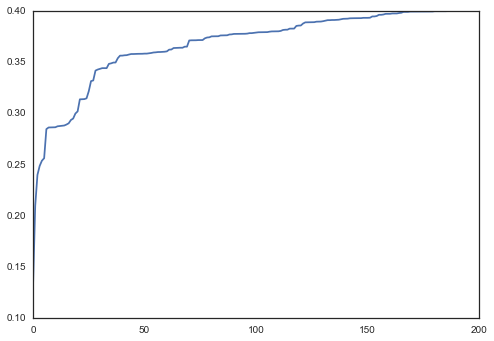

In [6]:
# see how r2 changes by feature importance 
fts = list(feat_imp.features)

lm = linear_model.LinearRegression()
y = bd[['EUIwn']]

scores = []
for i in range (1, len(fts)):
    X = bd[fts[0:i]]
    lm.fit(X,y)
    scores.append(metrics.r2_score(y, lm.predict(X)))

plt.plot(scores)

In [7]:
from sklearn import decomposition
import re

pca = decomposition.PCA(n_components=4)
pca.fit(bd[], y)
print pca.explained_variance_ratio_

SyntaxError: invalid syntax (<ipython-input-7-1c68b2456033>, line 5)

In [ ]:
# lasso regression
# Decision tree regressor
# random forest regressor

# look at reisduals more 

In [ ]:
# clustering using guassian distance based on where outliers are 

In [46]:
from sklearn import metrics, cross_validation

ImportError: cannot import name test_train_split

In [42]:
X = bd[features]
y = bd[['EUIwn']]
scores = []
for i in range(2, 20):
    tr = tree.DecisionTreeRegressor(max_depth=i, random_state=1234)
    tr.fit(X, y)
    print tr.score(X, y)

0.22308217804
0.280766374077
0.335789770803
0.384225463719
0.434295735376
0.487375375756
0.542520880125
0.593899426554
0.635120424444
0.676808494148
0.716477352014
0.750354126532
0.779152424931
0.804808657382
0.828499198194
0.853806502733
0.872726988925
0.888328581905


In [47]:
X = bd[features]
y = bd[['EUIwn_norm']]
scores = []
for i in range(2, 20):
    tr = tree.DecisionTreeRegressor(max_depth=i, random_state=1234)
    scores.append(cross_validation.cross_val_score(tr, X, y, cv=8, scoring='r2'))
scores

[array([ 0.1661679 ,  0.20143076,  0.25293602,  0.24463485,  0.11755802,
         0.15090909,  0.13231948,  0.12751088]),
 array([ 0.16271299,  0.20873249,  0.3018985 ,  0.25819574,  0.16747548,
         0.22518465,  0.19178943,  0.14688986]),
 array([ 0.18744278,  0.20514038,  0.3478476 ,  0.25160399,  0.16554103,
         0.20679791,  0.19562998,  0.1065916 ]),
 array([ 0.08794216,  0.18341769,  0.35447023,  0.26447906,  0.20484572,
         0.244448  ,  0.15712502,  0.13398057]),
 array([-0.01739131,  0.1847447 ,  0.34627181,  0.22792027,  0.19295078,
         0.1406748 ,  0.11147297,  0.14618014]),
 array([ 0.08992187,  0.14139386,  0.28453743,  0.25168   ,  0.14803072,
         0.06796498,  0.07294831,  0.00566482]),
 array([-0.02682799,  0.13206682,  0.2505833 ,  0.15519561,  0.1691742 ,
         0.10284006,  0.08509718, -0.01048547]),
 array([-0.18434763,  0.08615885,  0.31889297,  0.04497664,  0.19869444,
         0.06260446,  0.06958534, -0.09045677]),
 array([-0.23417076,  0.

In [44]:
y = bd[['EUIwn_norm']]

In [48]:
# random forest regressors (10 as test 500 max overnight)

In [ ]:
# 3what doesn't matter
